### Ensemble Techniques - Project
#### Indranil Saha - PGP AIML Jan 2024

In [3]:
# to handle data in form of rows and columns 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

from sklearn.metrics import r2_score

In [4]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [8]:
df = pd.merge(left=df1, right=df2, how='inner', on='customerID') 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#### checkpoint only creeated pure df

In [11]:
df1_list = list(df1.columns)
df2_list = list(df2.columns)

print('df.shape = {} x {}'.format(df.shape[0], df.shape[1]))
print('df1.shape = {} x {}'.format(df1.shape[0], df1.shape[1]))
print('df2.shape = {} x {}'.format(df2.shape[0], df2.shape[1]))
for col in df.columns:
    print('\n***********************\nColumn = {}\n================'.format(col))
    if col in df1_list:
        print('found in df1')
    if col in df2_list:
        print('found in df2')
    if col not in df1_list and col not in df2_list:
        print('Warning ******** Col {} is not found in either DataFrame')

df.shape = 7043 x 21
df1.shape = 7043 x 10
df2.shape = 7043 x 12

***********************
Column = customerID
found in df1
found in df2

***********************
Column = gender
found in df1

***********************
Column = SeniorCitizen
found in df1

***********************
Column = Partner
found in df1

***********************
Column = Dependents
found in df1

***********************
Column = tenure
found in df1

***********************
Column = PhoneService
found in df1

***********************
Column = MultipleLines
found in df1

***********************
Column = InternetService
found in df1

***********************
Column = OnlineSecurity
found in df1

***********************
Column = OnlineBackup
found in df2

***********************
Column = DeviceProtection
found in df2

***********************
Column = TechSupport
found in df2

***********************
Column = StreamingTV
found in df2

***********************
Column = StreamingMovies
found in df2

***********************
Column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['gender'].isnull().any()

False

In [14]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [15]:
df['SeniorCitizen'].isnull().any()

False

In [16]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [18]:
df['Partner'].isnull().any()

False

In [19]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [20]:
df['Dependents'].isnull().any()

False

In [21]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [22]:
df['tenure'].isnull().any()

False

In [23]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [24]:
df['PhoneService'].isnull().any()

False

In [25]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [26]:
df['MultipleLines'].isnull().any()

False

In [27]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [28]:
# this column needs correction
df['MultipleLines'].replace(to_replace='No phone service', value='No', inplace=True)
df['MultipleLines'].value_counts()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [29]:
df['InternetService'].isnull().any()   

False

In [30]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [31]:
df['OnlineSecurity'].isnull().any()

False

In [32]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [33]:
# since no internet effectively implies no onlinesecurity, change the value to no
df['OnlineSecurity'].replace(to_replace='No internet service', value='No', inplace=True)
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

In [34]:
df['OnlineBackup'].isnull().any()

False

In [35]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [36]:
# following the same logic make changes to no internet means no
df['OnlineBackup'].replace(to_replace='No internet service', value='No', inplace=True)
df['OnlineBackup'].value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

In [37]:
df['DeviceProtection'].isnull().any()

False

In [38]:
df['DeviceProtection'].isnull().any()

False

In [39]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [40]:
# change values 
df['DeviceProtection'].replace(to_replace='No internet service', value='No', inplace=True)
df['DeviceProtection'].value_counts()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

In [41]:
df['TechSupport'].isnull().any()

False

In [42]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [43]:
df['TechSupport'].replace(to_replace='No internet service', value='No', inplace=True)
df['TechSupport'].value_counts()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

In [44]:
df['StreamingTV'].isnull().any()

False

In [45]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [46]:
df['StreamingTV'].replace(to_replace='No internet service', value='No', inplace=True)
df['StreamingTV'].value_counts()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

In [47]:
df['StreamingMovies'].isnull().any()

False

In [48]:
df['StreamingMovies'].value_counts()   

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [49]:
df['StreamingMovies'].replace(to_replace='No internet service', value='No', inplace=True)
df['StreamingMovies'].value_counts()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

In [50]:
df['Contract'].isnull().any()

False

In [51]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [52]:
df['PaperlessBilling'].isnull().any()

False

In [53]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [54]:
df['PaymentMethod'].isnull().any()

False

In [55]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [56]:
df['MonthlyCharges'].isnull().any()

False

In [57]:
df['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [58]:
df['TotalCharges'].isnull().any()

False

In [59]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [60]:
df['Churn'].isnull().any()

False

In [61]:
l = df['Churn'].value_counts()
l.keys()

Index(['No', 'Yes'], dtype='object', name='Churn')

In [62]:
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [63]:
'''
2 a Impute missing/unexpected values in the DataFrame
'''
# df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['TotalCharges'].isnull().sum()

0

In [64]:
df[ df['TotalCharges']==' ' ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [65]:
df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
# df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [66]:
df['TotalCharges'].isnull().sum()

11

In [67]:
df[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [68]:
df['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [69]:
'''
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df.iloc[:,:-1])
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data
'''
print('checkpoint before SimpleImputer\n')

checkpoint before SimpleImputer



In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
a = df['TotalCharges']
imputer.fit(a.to_frame())
# imputed_data = imputer.transform(df['TotalCharges'].values)
# df['TotalCharges'] = imputed_data

SimpleImputer()

In [71]:
imputer

SimpleImputer()

In [72]:
imputed_data = imputer.transform(df['TotalCharges'].to_frame())
imputed_data

array([[  29.85],
       [1889.5 ],
       [ 108.15],
       ...,
       [ 346.45],
       [ 306.6 ],
       [6844.5 ]])

In [73]:
df['TotalCharges'] = imputed_data
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [74]:
df['TotalCharges'].mean()

2283.3004408418656

In [75]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,2.0,0.0,5901.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,2,No,4072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,2,No,5024,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [77]:
# Check here for numeric columns
for i in df.index:
    if df.loc[i, 'MonthlyCharges'] < 0 or df.loc[i, 'MonthlyCharges'] == 0:
        print('MonthlyCharges->Found 0 value in {} '.format(i))
    if df.loc[i, 'TotalCharges'] < 0 or df.loc[i, 'TotalCharges'] == 0:
        print('TotalCharges->Found 0 value in {} '.format(i))    

#### Create a function that will accept a DataFrame as input
and return pie-charts for all theappropriate Categorical
features. Clearly show percentage distribution in the
pie-chart.
#### Share insights 

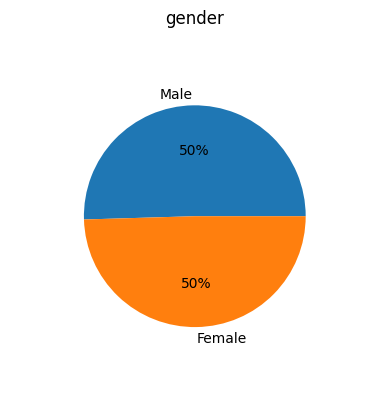

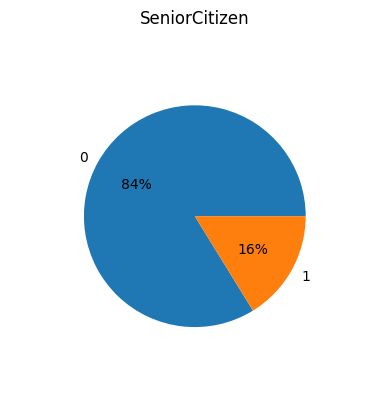

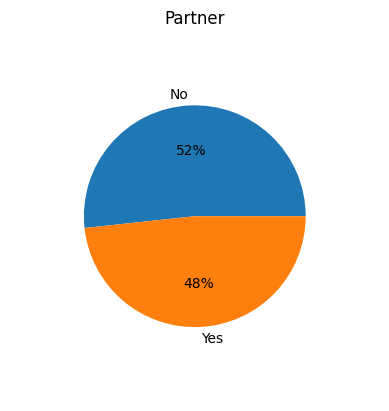

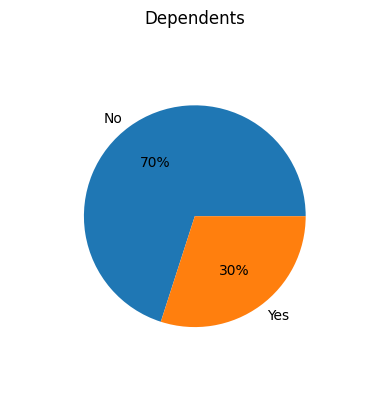

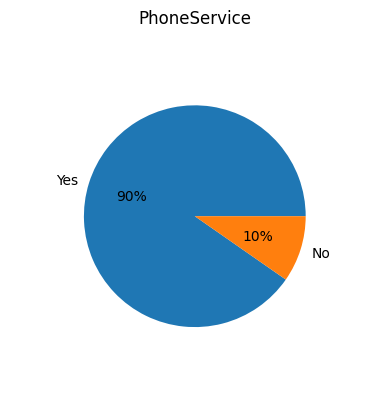

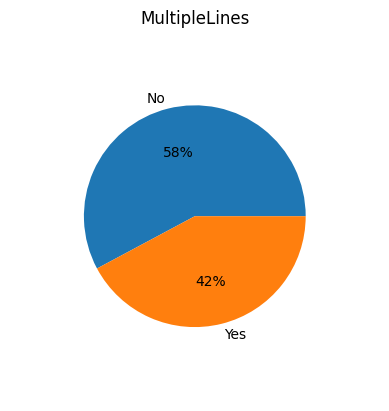

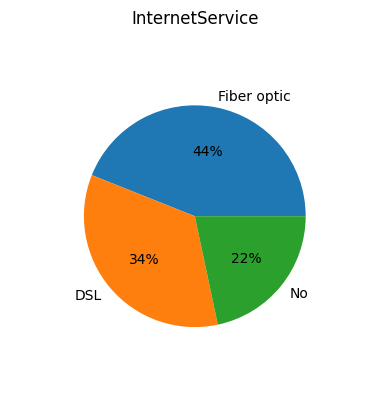

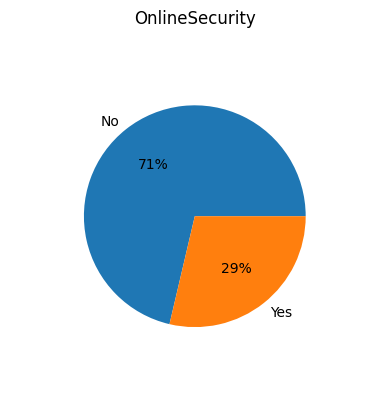

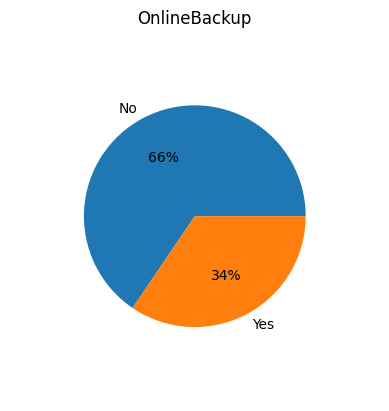

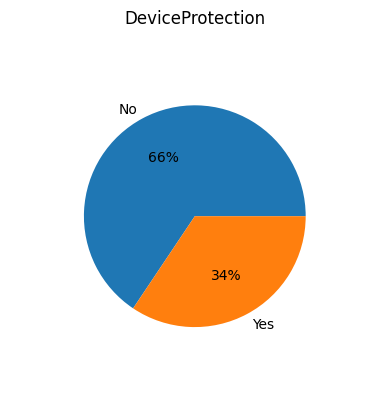

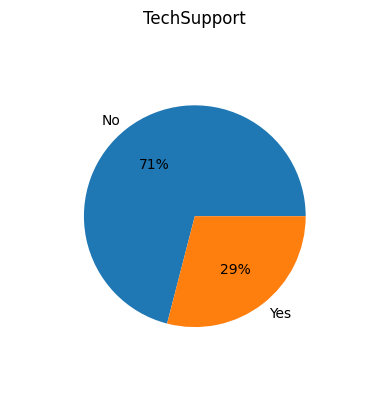

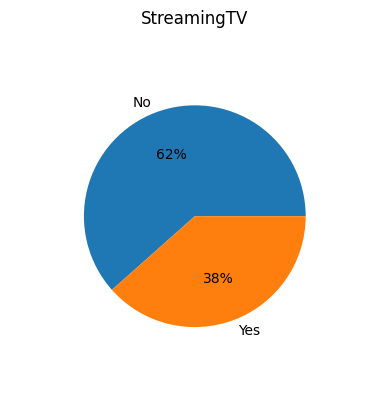

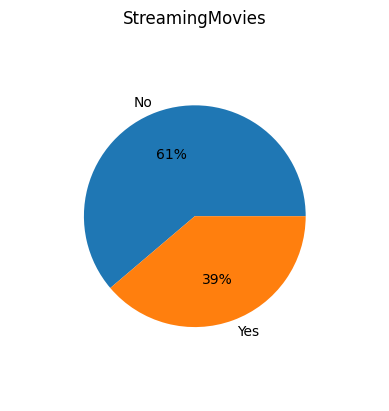

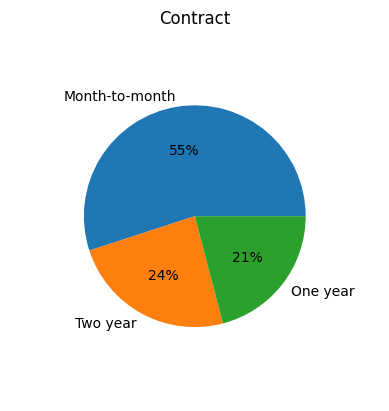

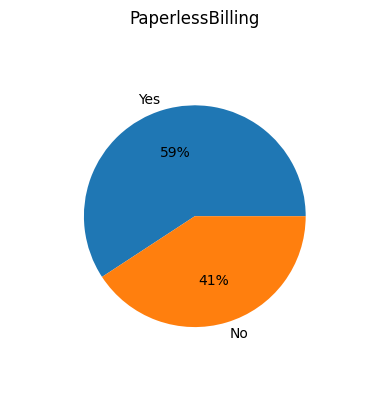

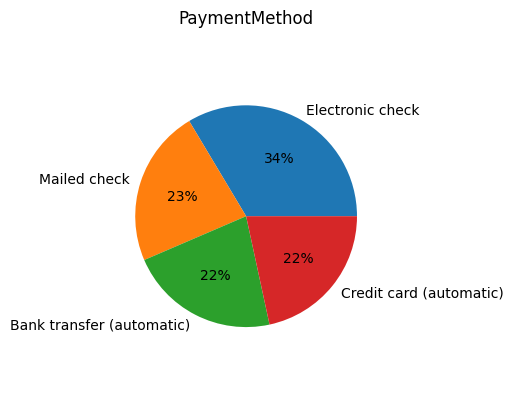

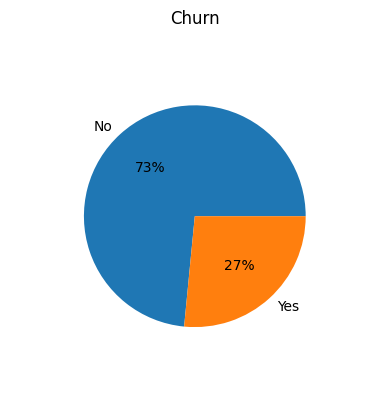

In [78]:
def show_pi_chart(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            if len(df[col].value_counts().keys()) < 10:
                fig, ax = plt.subplots()
                ax.set_title(col)
                ax.pie(data=df, labels=df[col].value_counts().keys(), x=df[col].value_counts(), autopct='%.0f%%', radius=0.75)
        plt.show()
show_pi_chart(df)
# plt.show()    

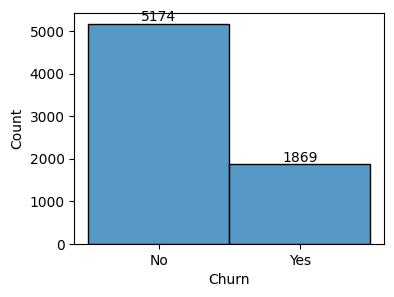

In [79]:
'''
Insights from pie chart observations
1. Data is dominated by Senior Citizen category.
2. Some implicit conversations are obvious which will taken care of before final model like
    a. PaymentMethod can be catgorized into 2 catgories - check and automatic
    b. PhoneService seems to be a very common feature loosing its imporatnce as a dependent variable. If curse of dimensionality becomes
       a factor, this feature may be dropped.
'''
# Custom function for data visualization 
def show_bar_val(ax):
    counts = []
    for bar in ax.patches:
        txval = bar.get_height()
        
        if txval.is_integer()==True:
            txval = int(txval)
        else:
            txval = round(txval, 4)
        
        ax.text( bar.get_x() + bar.get_width() / 2, bar.get_height(), s=txval, ha='center', va='bottom')
        counts.append(bar.get_height())
    return counts

fig,ax = plt.subplots(figsize=(4,3))
sns.histplot(data=df, x='Churn')
show_bar_val(ax)
plt.show()

In [80]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [84]:
# 2 b Make sure all the variables with continuous values are of ‘Float’ type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D gender array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.gender.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["G_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the gender column 
df.drop(['gender', 'G_0'], axis=1, inplace=True) 
#printing to verify 
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,G_1
0,7590-VHVEG,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1.0
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0
3,7795-CFOCW,0,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1.0
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0


In [81]:
# Seniorcitizen creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D Seniorcitizen array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.SeniorCitizen.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["SR_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the Seniorcitizen column 
df.drop(['SeniorCitizen', 'SR_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID Partner Dependents  tenure PhoneService MultipleLines  \
0  7590-VHVEG     Yes         No       1           No            No   
1  5575-GNVDE      No         No      34          Yes            No   
2  3668-QPYBK      No         No       2          Yes            No   
3  7795-CFOCW      No         No      45           No            No   
4  9237-HQITU      No         No       2          Yes            No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection  ...  \
0             DSL             No          Yes               No  ...   
1             DSL            Yes           No              Yes  ...   
2             DSL            Yes          Yes               No  ...   
3             DSL            Yes           No              Yes  ...   
4     Fiber optic             No           No               No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No 

In [82]:
# Partner creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D Partner array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.Partner.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["P_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the Partner column 
df.drop(['Partner', 'P_0'], axis=1, inplace=True) 
#printing to verify 
df.head()

,customerID,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,G_1,SR_1,P_1
0,7590-VHVEG,No,1,No,No,DSL,No,Yes,No,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0,0.0,1.0
1,5575-GNVDE,No,34,Yes,No,DSL,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,1.0,0.0,0.0
2,3668-QPYBK,No,2,Yes,No,DSL,Yes,Yes,No,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,0.0,0.0
3,7795-CFOCW,No,45,No,No,DSL,Yes,No,Yes,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0,0.0
4,9237-HQITU,No,2,Yes,No,Fiber optic,No,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0,0.0,0.0


In [83]:
# Dependents creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D Dependents array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.Dependents.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["D_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the Dependents column 
df.drop(['Dependents', 'D_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure PhoneService MultipleLines InternetService  \
0  7590-VHVEG       1           No            No             DSL   
1  5575-GNVDE      34          Yes            No             DSL   
2  3668-QPYBK       2          Yes            No             DSL   
3  7795-CFOCW      45           No            No             DSL   
4  9237-HQITU       2          Yes            No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  ...  \
0             No          Yes               No          No          No  ...   
1            Yes           No              Yes          No          No  ...   
2            Yes          Yes               No          No          No  ...   
3            Yes           No              Yes         Yes          No  ...   
4             No           No               No          No          No  ...   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month              Yes  

In [84]:
# PhoneService creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D PhoneService array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.PhoneService.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["PS_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the PhoneService column 
df.drop(['PhoneService', 'PS_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure MultipleLines InternetService OnlineSecurity  \
0  7590-VHVEG       1            No             DSL             No   
1  5575-GNVDE      34            No             DSL            Yes   
2  3668-QPYBK       2            No             DSL            Yes   
3  7795-CFOCW      45            No             DSL            Yes   
4  9237-HQITU       2            No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  ...  \
0          Yes               No          No          No              No  ...   
1           No              Yes          No          No              No  ...   
2          Yes               No          No          No              No  ...   
3           No              Yes         Yes          No              No  ...   
4           No               No          No          No              No  ...   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0              Yes  

In [85]:
# MultipleLines creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D MultipleLines array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.MultipleLines.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["ML_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the MultipleLines column 
df.drop(['MultipleLines','ML_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG       1             DSL             No          Yes   
1  5575-GNVDE      34             DSL            Yes           No   
2  3668-QPYBK       2             DSL            Yes          Yes   
3  7795-CFOCW      45             DSL            Yes           No   
4  9237-HQITU       2     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   ...              PaymentMethod MonthlyCharges  TotalCharges  Churn  G_1  \
0  ...           Electronic check     

In [86]:
# InternetService creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D InternetService array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.InternetService.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["IS_"+str(int(i)) for i in range(3)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the InternetService column 
df.drop(['InternetService', 'IS_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG       1             No          Yes               No   
1  5575-GNVDE      34            Yes           No              Yes   
2  3668-QPYBK       2            Yes          Yes               No   
3  7795-CFOCW      45            Yes           No              Yes   
4  9237-HQITU       2             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

   ... TotalCharges  Churn  G_1 SR_1  P_1  D_1  PS_1  ML_1  IS_1  IS_2  
0  ...        29.85     No  0.0  0.0 

In [87]:
df_copy = df.copy()

In [88]:
# df = df_copy.copy()
# OnlineSecurity creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D OnlineSecurity array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.OnlineSecurity.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["OS_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the OnlineSecurity column 
df.drop(['OnlineSecurity', 'OS_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG       1          Yes               No          No          No   
1  5575-GNVDE      34           No              Yes          No          No   
2  3668-QPYBK       2          Yes               No          No          No   
3  7795-CFOCW      45           No              Yes         Yes          No   
4  9237-HQITU       2           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   ...  Churn  G_1 SR_1  P_1  D_1  PS_

In [89]:
# OnlineBackup creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D OnlineBackup array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.OnlineBackup.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["OB_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the OnlineBackup column 
df.drop(['OnlineBackup', 'OB_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG       1               No          No          No   
1  5575-GNVDE      34              Yes          No          No   
2  3668-QPYBK       2               No          No          No   
3  7795-CFOCW      45              Yes         Yes          No   
4  9237-HQITU       2               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges  ...  G_1 SR_1  P_1  D_1  PS_1  ML_1  IS_1  IS_2  OS_1  OB_1  
0           29.85  ...  0.0  0.0  1

In [90]:
# DeviceProtection creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D DeviceProtection array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.DeviceProtection.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["DP_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the DeviceProtection column 
df.drop(['DeviceProtection', 'DP_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure TechSupport StreamingTV StreamingMovies        Contract  \
0  7590-VHVEG       1          No          No              No  Month-to-month   
1  5575-GNVDE      34          No          No              No        One year   
2  3668-QPYBK       2          No          No              No  Month-to-month   
3  7795-CFOCW      45         Yes          No              No        One year   
4  9237-HQITU       2          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   ... SR_1  P_1  D_1  PS_1  ML_1  IS_

In [91]:
# TechSupport creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D TechSupport array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.TechSupport.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["TS_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the TechSupport column 
df.drop(['TechSupport', 'TS_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure StreamingTV StreamingMovies        Contract  \
0  7590-VHVEG       1          No              No  Month-to-month   
1  5575-GNVDE      34          No              No        One year   
2  3668-QPYBK       2          No              No  Month-to-month   
3  7795-CFOCW      45          No              No        One year   
4  9237-HQITU       2          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  ...  P_1  D_1  PS_1  ML_1  IS_1  IS_2  OS_1  OB_1  DP_1  TS_1  
0    No  ...  1.0  0.0   0.0   0.0   

In [92]:
# StreamingTV creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D StreamingTV array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.StreamingTV.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["ST_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the StreamingTV column 
df.drop(['StreamingTV', 'ST_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure StreamingMovies        Contract PaperlessBilling  \
0  7590-VHVEG       1              No  Month-to-month              Yes   
1  5575-GNVDE      34              No        One year               No   
2  3668-QPYBK       2              No  Month-to-month              Yes   
3  7795-CFOCW      45              No        One year               No   
4  9237-HQITU       2              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  G_1  ...  \
0           Electronic check           29.85         29.85    No  0.0  ...   
1               Mailed check           56.95       1889.50    No  1.0  ...   
2               Mailed check           53.85        108.15   Yes  1.0  ...   
3  Bank transfer (automatic)           42.30       1840.75    No  1.0  ...   
4           Electronic check           70.70        151.65   Yes  0.0  ...   

   D_1  PS_1  ML_1  IS_1  IS_2  OS_1  OB_1  DP_1  TS_1  ST_1  
0  0.0   0.0   0.0   0.

In [93]:
# StreamingMovies creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D StreamingMovies array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.StreamingMovies.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["SM_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the StreamingMovies column 
df.drop(['StreamingMovies', 'SM_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure        Contract PaperlessBilling  \
0  7590-VHVEG       1  Month-to-month              Yes   
1  5575-GNVDE      34        One year               No   
2  3668-QPYBK       2  Month-to-month              Yes   
3  7795-CFOCW      45        One year               No   
4  9237-HQITU       2  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  G_1  SR_1  \
0           Electronic check           29.85         29.85    No  0.0   0.0   
1               Mailed check           56.95       1889.50    No  1.0   0.0   
2               Mailed check           53.85        108.15   Yes  1.0   0.0   
3  Bank transfer (automatic)           42.30       1840.75    No  1.0   0.0   
4           Electronic check           70.70        151.65   Yes  0.0   0.0   

   ...  PS_1  ML_1  IS_1  IS_2  OS_1  OB_1  DP_1  TS_1  ST_1  SM_1  
0  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
1  ...   1.0   0.0   0.0   0.0   1.0  

In [94]:
df['Contract'].tail(25)

7018    Month-to-month
7019          Two year
7020    Month-to-month
7021          One year
7022          One year
7023    Month-to-month
7024    Month-to-month
7025    Month-to-month
7026    Month-to-month
7027    Month-to-month
7028          Two year
7029    Month-to-month
7030    Month-to-month
7031          One year
7032    Month-to-month
7033    Month-to-month
7034    Month-to-month
7035    Month-to-month
7036          One year
7037          Two year
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, dtype: object

In [95]:
# Contract to be label encoded as Month < One Year < Two Year
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Contract'. 
df['Contract']= label_encoder.fit_transform(df['Contract']) 
df['Contract'].tail(25)

7018    0
7019    2
7020    0
7021    1
7022    1
7023    0
7024    0
7025    0
7026    0
7027    0
7028    2
7029    0
7030    0
7031    1
7032    0
7033    0
7034    0
7035    0
7036    1
7037    2
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, dtype: int32

In [96]:
# PaperlessBilling creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D PaperlessBilling array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.PaperlessBilling.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["PL_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the PaperlessBilling column 
df.drop(['PaperlessBilling', 'PL_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure  Contract              PaymentMethod  MonthlyCharges  \
0  7590-VHVEG       1         0           Electronic check           29.85   
1  5575-GNVDE      34         1               Mailed check           56.95   
2  3668-QPYBK       2         0               Mailed check           53.85   
3  7795-CFOCW      45         1  Bank transfer (automatic)           42.30   
4  9237-HQITU       2         0           Electronic check           70.70   

   TotalCharges Churn  G_1  SR_1  P_1  ...  ML_1  IS_1  IS_2  OS_1  OB_1  \
0         29.85    No  0.0   0.0  1.0  ...   0.0   0.0   0.0   0.0   1.0   
1       1889.50    No  1.0   0.0  0.0  ...   0.0   0.0   0.0   1.0   0.0   
2        108.15   Yes  1.0   0.0  0.0  ...   0.0   0.0   0.0   1.0   1.0   
3       1840.75    No  1.0   0.0  0.0  ...   0.0   0.0   0.0   1.0   0.0   
4        151.65   Yes  0.0   0.0  0.0  ...   0.0   1.0   0.0   0.0   0.0   

   DP_1  TS_1  ST_1  SM_1  PL_1  
0   0.0   0.0   0.0   0.0   1.0  
1   1.

In [97]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [98]:
df['PaymentMethod'].replace('Electronic check', 'Check', inplace=True)
df['PaymentMethod'].replace('Mailed check', 'Check', inplace=True)
df['PaymentMethod'].replace('Bank transfer (automatic)', 'Auto', inplace=True)
df['PaymentMethod'].replace('Credit card (automatic)', 'Auto', inplace=True)
df['PaymentMethod'].value_counts()

PaymentMethod
Check    3977
Auto     3066
Name: count, dtype: int64

In [99]:
# PaymentMethod creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D PaymentMethod array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.PaymentMethod.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["PM_"+str(int(i)) for i in range(2)])
df = pd.concat([df, dfOneHot], axis=1)
#droping the PaymentMethod column 
df.drop(['PaymentMethod', 'PM_0'], axis=1, inplace=True) 
#printing to verify 
print(df.head())

   customerID  tenure  Contract  MonthlyCharges  TotalCharges Churn  G_1  \
0  7590-VHVEG       1         0           29.85         29.85    No  0.0   
1  5575-GNVDE      34         1           56.95       1889.50    No  1.0   
2  3668-QPYBK       2         0           53.85        108.15   Yes  1.0   
3  7795-CFOCW      45         1           42.30       1840.75    No  1.0   
4  9237-HQITU       2         0           70.70        151.65   Yes  0.0   

   SR_1  P_1  D_1  ...  IS_1  IS_2  OS_1  OB_1  DP_1  TS_1  ST_1  SM_1  PL_1  \
0   0.0  1.0  0.0  ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   
1   0.0  0.0  0.0  ...   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   
2   0.0  0.0  0.0  ...   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   
3   0.0  0.0  0.0  ...   0.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   
4   0.0  0.0  0.0  ...   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

   PM_1  
0   1.0  
1   1.0  
2   1.0  
3   0.0  
4   1.0  

[

In [100]:
# Function to calculate VIF
import statsmodels.api as sm

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df.drop(['customerID', 'Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'],axis=1)
calculate_vif(X)

,Var,Vif
5,PS_1,8.67
7,IS_1,3.49
8,IS_2,3.15
0,Contract,2.99
3,P_1,2.69
15,PL_1,2.69
14,SM_1,2.63
13,ST_1,2.62
6,ML_1,2.30
16,PM_1,2.27


In [101]:
df.drop('PS_1', axis=1, inplace=True)
df.drop('customerID', axis=1, inplace=True)
X=df.drop(['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure'],axis=1)
calculate_vif(X)

,Var,Vif
0,Contract,2.99
6,IS_1,2.79
3,P_1,2.68
13,SM_1,2.63
12,ST_1,2.62
14,PL_1,2.56
5,ML_1,2.19
10,DP_1,2.19
7,IS_2,2.18
15,PM_1,2.05


In [102]:
#standardization of data - Normalize/Standardize the data with the best suitable approach
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
new_data=df.drop(['Churn'], axis=1)
X_std = pd.DataFrame(StandardScaler().fit_transform(new_data))
X_std.columns = new_data.columns

# f.Split the data into 80% train and 20% test.

from sklearn.model_selection import train_test_split
# Transform data into features and target
X = np.array(X_std) 
y = np.array(df['Churn'])
# split into train and test all features
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=7)
print('With all features\n******************')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

With all features
******************
(5634, 19)
(5634,)
(1409, 19)
(1409,)


In [103]:
'''
Train a model using Decision tree and check the
performance of the model on train and test data 4.0 pts week1 Ensemble techniques
3.b Use grid search and improve the performance of the
Decision tree model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.a and Q3.b
'''
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [104]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9978700745473909
0.7210787792760823


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],  
              'splitter': ['best', 'random'], 
              #'max_depth':['None', 'auto'],
              #'min_samples_split': ['linear'],
              #'min_samples_leaf':[],
              #'min_weight_fraction_leaf':[],
              'max_features':['sqrt', 'log2', None],
              'ccp_alpha':ccp_alphas
             }  
   
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 8244 candidates, totalling 41220 fits
{'ccp_alpha': 0.0010525469089673022, 'criterion': 'entropy', 'max_features': None, 'splitter': 'random'}
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1021
         Yes       0.63      0.56      0.59       388

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [106]:
print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))

0.7957046503372383
0.78708303761533


In [107]:
'''
From the above it is evident that the model performance has improved in train data (overfit vs. normal) and in test data - improvemnet of score
'''
#RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 5, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.9666311679091232
0.7700496806245565


In [108]:
# defining parameter range 
n_range = np.arange(start=1, stop=101)
ccp_alphas = np.arange(start=0, stop=1, step=.1) 

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],  
              'n_estimators': n_range, 
              #'max_depth':['None', 'auto'],
              #'min_samples_split': ['linear'],
              #'min_samples_leaf':[],
              #'min_weight_fraction_leaf':[],
              'max_features':['sqrt', 'log2', None],
              'ccp_alpha':ccp_alphas,
              'warm_start': [False, True]
             }  
   
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_rf.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid_rf.best_params_)

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 92, 'warm_start': True}


In [109]:
grid_rf_predictions = grid_rf.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_rf_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1021
         Yes       0.69      0.51      0.59       388

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [110]:
print(grid_rf.score(X_train, y_train))
print(grid_rf.score(X_test, y_test))
print(grid_rf.best_params_)

0.9978700745473909
0.8026969481902059
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 92, 'warm_start': True}


In [111]:
'''
RandomForest has improved in GridSearch. Train data is highly overfitted while test data is good 80% accurate 
warm_start is doubling the count but does not significantly alter performace. Planning to ommit it in personal
computer limited infrastreucture for shortening runtime.
'''
#AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=5, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
print(abcl.score(X_train, y_train))
print(abcl.score(X_test, y_test))

0.7752928647497338
0.7743080198722498


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

learning_rate = np.arange(start=0.01, stop=1.1, step=.05)
n_range = np.arange(start=1, stop=21)

param_grid = {'n_estimators': n_range, 
              'learning_rate': learning_rate,
              'algorithm': ['SAMME', 'SAMME.R'] 
             }  
   
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_ada.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid_ada.best_params_)

Fitting 5 folds for each of 880 candidates, totalling 4400 fits
{'algorithm': 'SAMME.R', 'learning_rate': 0.91, 'n_estimators': 20}


In [113]:
print(grid_ada.score(X_train, y_train))
print(grid_ada.score(X_test, y_test))

0.8028044018459354
0.808374733853797


In [114]:
'''
AdaBoost is consistent in train and test data. Does not suffer from overfit, underfit problem
After GridSearch with limnited options, performance improves consistently in both Test and train data. 
'''
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=5)
gbcl.fit(X_train, y_train)
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test, y_test))

0.7371317003904864
0.7246273953158269


In [115]:
learning_rate = np.arange(start=0.1, stop=1.1, step=.05)
n_range = np.arange(start=1, stop=21)

param_grid = {'n_estimators': n_range, 
              'learning_rate': learning_rate,
              'max_features': ['sqrt', 'log2', None]
             }  
   
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_gb.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid_gb.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
{'learning_rate': 0.5000000000000001, 'max_features': 'sqrt', 'n_estimators': 16}


In [116]:
print(grid_gb.score(X_train, y_train))
print(grid_gb.score(X_test, y_test))

0.8111466098686546
0.8133427963094393


In [98]:
'''
GradientBoost like AdaBoost, is consistent in train and test data. Does not suffer from overfit, underfit problem
After GridSearch with limited options, performance improves consistently in both Test and train data. 
'''

'''
3.i Provide detailed analysis of the below steps
i Compare the performance of each model in train
stage and test stage
II ) Provide your observation on which model performed
the best
III )Provide your reasoning on why the model performed
best
iv )Provide your final conclusion on your observation
'''
dtree_org_train = 0.9978700745473909
dtree_org_test = 0.7210787792760823
dtree_grid_optimized_train = 0.7957046503372383
dtree_grid_optimized_test = 0.78708303761533

rf_org_train = 0.9666311679091232
rf_org_test = 0.7700496806245565
rf_grid_optimized_train = 0.9978700745473909
rf_grid_optimized_test = 0.8026969481902059

ada_org_train = 0.7752928647497338
ada_org_test = 0.7743080198722498
ada_grid_optimized_train = 0.8028044018459354
ada_grid_optimized_test = 0.808374733853797

gb_org_train = 0.7371317003904864
gb_org_test = 0.7246273953158269
gb_grid_optimized_train = 0.8111466098686546
gb_grid_optimized_test = 0.8133427963094393

rep = pd.DataFrame({'TrainOriginal': [dtree_org_train, rf_org_train, ada_org_train, gb_org_train ],
                    'TestOriginal': [dtree_org_test, rf_org_test, ada_org_test, gb_org_test], 
                    'TrainOptimized': [dtree_grid_optimized_train, rf_grid_optimized_train, ada_grid_optimized_train, gb_grid_optimized_train], 
                   'TestOptimized': [dtree_grid_optimized_test, rf_grid_optimized_test, ada_grid_optimized_test, gb_grid_optimized_test]}, 
                    index=['DecisionTree', 'RandomForest', 'AdaBoost', 'GradientBoost'])
rep

,TrainOriginal,TestOriginal,TrainOptimized,TestOptimized
DecisionTree,0.997870,0.721079,0.795705,0.787083
RandomForest,0.966631,0.770050,0.997870,0.802697
AdaBoost,0.775293,0.774308,0.802804,0.808375
GradientBoost,0.737132,0.724627,0.811147,0.813343


#### Observations:
1. Boosting models performs better in train data sets. Both Ada and Gradient Boost avoids overfitting.
2. GridSearch was not used to full potential due to limted infrastructure (laptop i3-10th Gen/16GB, no graphics)
3. Some newly introduced parameters like ccp_alpha in RandomForest was not explored
4. Intitively cherry picked a few parameters for optimization which logically expected to provide good result

#### Final Recommendation is to use boosted GradienBoost model for best results across train and test data consistently.  